In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

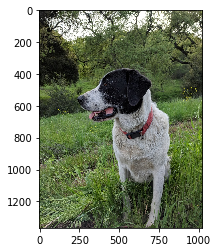

In [3]:
full=cv2.imread('DATA/sammy.jpg')
full=cv2.cvtColor(full,cv2.COLOR_BGR2RGB)
plt.imshow(full)

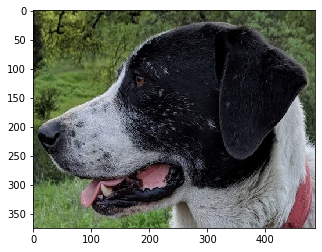

In [4]:
#template img subset of larger image.
face=cv2.imread('DATA/sammy_face.jpg ')
face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [9]:
methods=['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

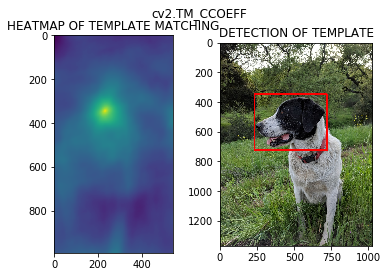

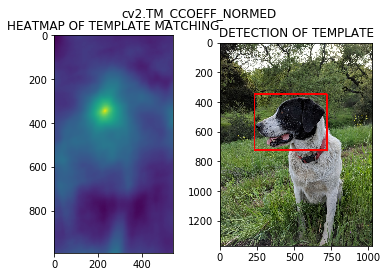

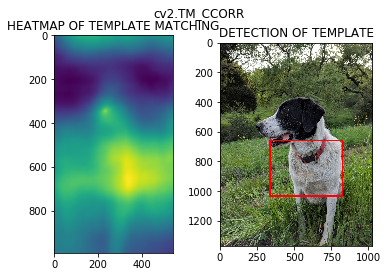

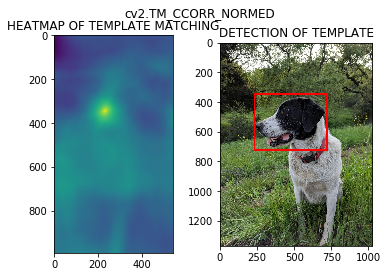

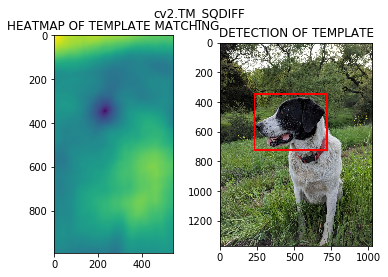

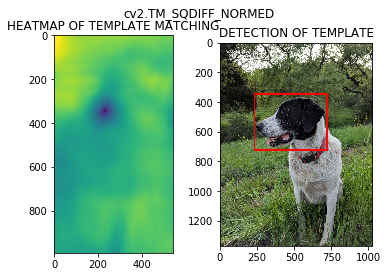

In [10]:
for m in methods:
    #create a copy
    full_copy=full.copy()
    method=eval(m)
    
    #template matching
    res=cv2.matchTemplate(full_copy,face,method)
    min_val,max_val, min_loc,max_loc=cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc
    else:
        top_left=max_loc
        
    height,width,channels=face.shape
    
    bottom_right=top_left[0]+width, top_left[1]+height
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    #PLOT AND SHOW IMAGE
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
    #TITLE WITH THE METHOD USED
    plt.suptitle(m)
    plt.show()
    
    print('\n')
    print('\n')
    
        
    